GUID: 2663452m

# Introduction
The Hall effect is the production of a potential difference across an electrical conductor, transverse to an electric current in the conductor and to an applied magnetic field perpendicular to the current. It was discovered by Edwin Hall in 1879. It commonly occurs in a rectangular conductor, such as a metal sheet or in sqecific types of semicinductors in this case a combination of a Galium Arsenide and an Aluminium Gallium Arsenide semiconductor, these two combined gives rise to a 2D electron gas or 2DEG that occupies a potential well created by the semiconducting materials. This electron gas as suggested is only able tp move with 2 degrees of freedom and is therefore confined to the plane of the semiconductor.


# Aims
Within this experiment we aim to obtain values for the carrier density and mobility of the 2DEG within the semiconductor at room temperature and close to liquid nitrogen temperature and compare these results. This is done by measuring the Hall voltage and the resistivity through our sample of semiconductor (Hall Bar).

# Equipment

* Digital Multimeter - Used to measure the voltage and current through the sample.  <br>
* Digital Power Supply - Used to supply a voltage through the sample. <br>
* Electromagnet - Used to apply a magnetic field perpendicular to the sample. <br>
* Sample - The sample is a Hall bar made of a combination of a Galium Arsenide and an Aluminium Gallium Arsenide semiconductor. <br>
* Hall Effect Probe - Used to measure the magnetic field applied to the sample. <br>
* Liquid Nitrogen - Used to cool the sample to a temperature close to 77K. <br>
* Python 3.10 <br>
* HallPy_Teach - A python package used to automate the data collection from the experiment. <br>




In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.constants as const
import pickle
import pandas as pd
import os
# import warnings
# warnings.filterwarnings('ignore')


WIDTH = 100e-6
LENGTH = 300e-6
plt.style.use('../report.mplstyle')


# Manual Data Collection 

## Objectives
* To familiarise ourselves with the equipment and the experiment. <br>
* To take measurements of the Hall voltage and the Longitudinal voltage of the Hall bar. <br>
* To take measurements of the magnetic field applied to the Hall bar using the Hall Probe. <br>
* To calculate the carrier density and mobility of the 2DEG within the semiconductor. <br>


## Background Theory
The Hall voltage is given by taking a reading of the potential difference across the Hall bar perpendicular to the supply current and the magnetic field. This can be used to calculate the 2 dimensional Hall coeffiecient and 2 dimensional carrier density.
The equation for the 2D Hall coefficient is given by: <br>
$$R_{H,sq} = \frac{V_H}{IB}      \tag{1}$$ 
where $V_H$ is the Hall voltage, $I$ is the current through the Hall bar and $B$ is the magnetic field applied to the Hall bar. <br> 
The equation for the 2D carrier density is given by: <br>
$$n_{sq} = \frac{1}{eR_{H,sq}}      \tag{2}$$ 
where $e$ is the charge of an electron. <br>

The Longitudinal voltage is given by taking a reading of the potential difference across the Hall bar parallel to the supply current. This can be used to calculate the 2 dimensional resistivity and thus the 2 dimensional mobility.
The equation for the 2D resistivity is given by: <br>
$$R_{sq} = R\frac{w}{l}   \tag{3}$$ 
where $R$ is the resistance of the Hall bar, $w$ is the width of the Hall bar and $l$ is the length of the Hall bar <br>
and the resistance is given by Ohms law $R = \frac{V}{I}$ where $V$ is the potential difference across the Hall bar and $I$ is the current through the Hall bar
The equation for the 2D mobility is given by: <br>
$$\mu= \frac{1}{eR_{sq}n_{sq}}   \tag{4}$$ 
where $e$ is the charge of an electron, $R_{sq}$ is the 2D resistivity and $n_{sq}$ is the 2D carrier density. <br>

## Method

The Hall bar was connected to one of the digital power supplies and to both digital multimeters one to measure the voltage and the other to measure the current. The electromagnet was connected to the other power supply.
first we took measurements of the longitudinal voltage and current across a varying input voltage of 2V to 12V in 2V increments the plot of this can be seen in Figure 1.
The Hall bar was then set up in the Hall voltage configuration and the Hall voltage and current were measured with a constant input voltage and a varying magnetic field of 7mT to 35mT.
Measurements were then taken for the longitudinal voltage and current with a constant input voltage and a varying magnetic field of 7mT to 35mT to measure if there were any dependence on the magnetic field.
A summary of these results can be seen in Figure 2. 




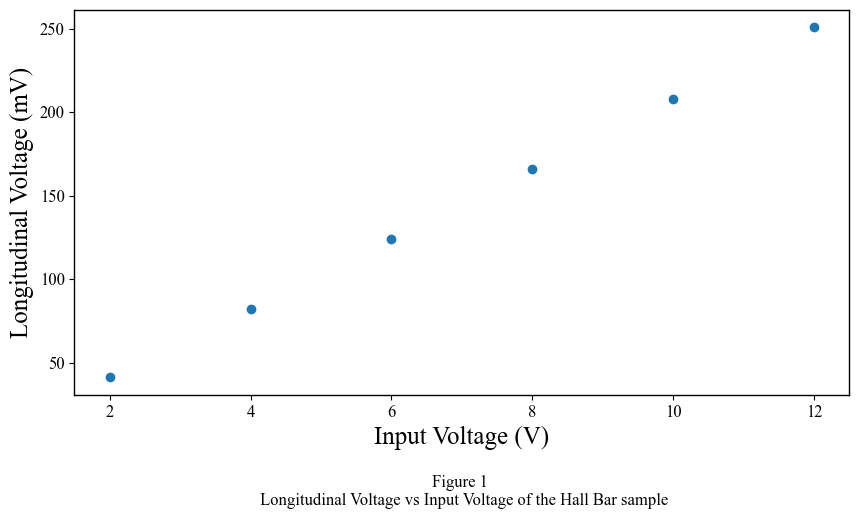

In [38]:

data = np.loadtxt('data/no_mag.txt', skiprows=3)

# Data
input_vol = data[:, 0]
output_vol = data[:, 1]
output_current = data[:, 2]

plt.figure(figsize=(10, 5))
plt.subplot
plt.plot(input_vol, output_vol, 'o', label='Data')
plt.xlabel('Input Voltage (V)')
plt.ylabel('Longitudinal Voltage (mV)')
plt.text(7,-35, 'Figure 1 \n Longitudinal Voltage vs Input Voltage of the Hall Bar sample', horizontalalignment='center')
plt.show()


From Figure 1 we can see that the longitudinal voltage is linearly proportional to the input voltage.

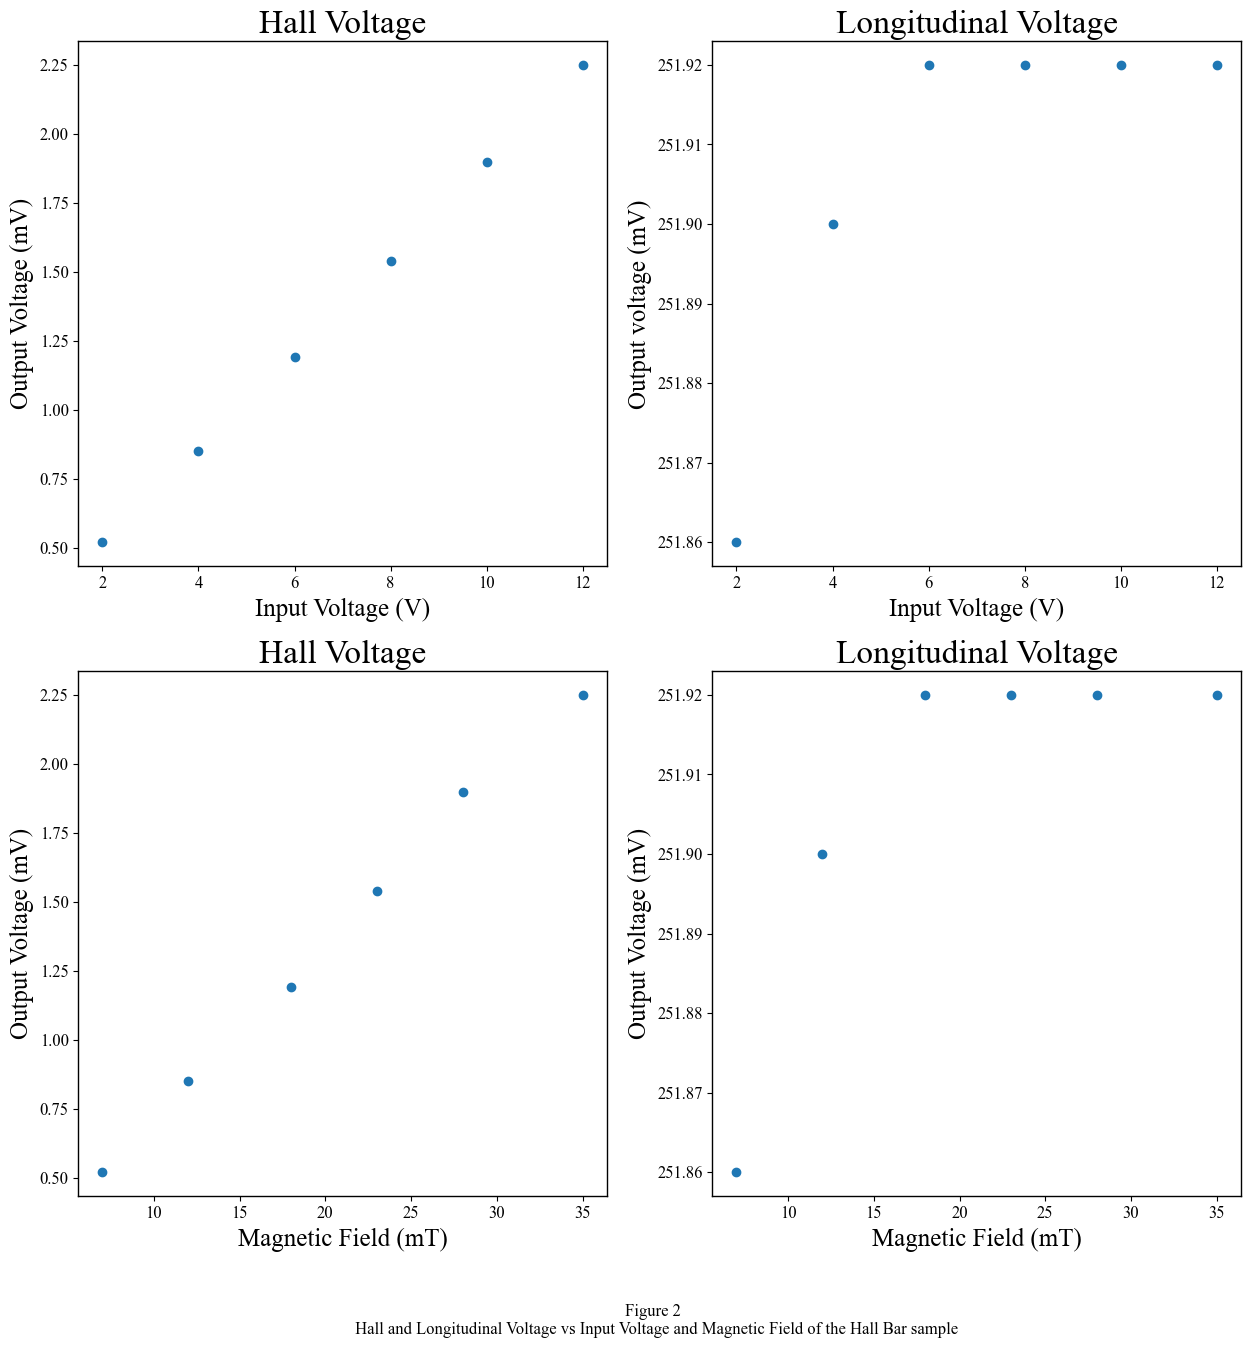

The number density in the Hall bar is 5.647e+15, and the mobility is 0.491


In [39]:
def r_hall_2d(B, I, Vh):
    '''
    B is the magnetic field in mT \n
    I is the current in micro A \n
    Vh is the hall voltage in mV
    '''
    return Vh/(I*B*1e-3)

def res(V,I):
    '''
    V is the voltage in mV \n
    I is the current in micro A
    '''
    return (V*1e-3)/(I*1e-6)

def r_per_sq(res, width, length):
    '''
    res is the resistance in ohms \n
    width is the width of the sample in micro m \n
    length is the length of the sample in micro m
    '''
    return (res*width)/length

def num_per_sq(r_hall_2d):
    '''
    r_hall_2d is the function with parameters (B, I, Vh) \n
    '''
    return 1/(r_hall_2d*const.e)

def mobility(r_per_sq, n_per_sq):
    '''
    r_per_sq is the function with parameters (res, width, length) \n
    n_per_sq is the function with parameters (B, I, Vh) \n
    '''
    return 1/(n_per_sq*r_per_sq*const.e)#


data_hall = np.loadtxt('data/hall_mag_manual.txt', skiprows=3)
data_long = np.loadtxt('data/long_mag_manual.txt', skiprows=3)
hall_err = {
    '''
    out_vol in V
    out_cur in A
    b_field in T
    '''
    'out_vol': [5e-6,5e-6,5e-6,5e-6,5e-6,5e-6],
    'out_cur': [5e-9,5e-9,5e-9,5e-9,5e-9,5e-9],
    'b_field': [5e-4,5e-4,5e-4,5e-4,5e-4,5e-4]
    }

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.text(13.5,-2.35, 'Figure 2 \n Hall and Longitudinal Voltage vs Input Voltage and Magnetic Field of the Hall Bar sample', horizontalalignment='center')
plt.plot(data_hall[:, 0], data_hall[:, 1], 'o', label='Data')
plt.xlabel('Input Voltage (V)')
plt.ylabel('Output Voltage (mV)')
plt.title('Hall Voltage')
plt.subplot(2,2,2)
plt.plot(data_long[:, 0], data_long[:, 1], 'o', label='Data')
plt.xlabel('Input Voltage (V)')
plt.ylabel('Output voltage (mV)')
plt.title('Longitudinal Voltage')
plt.subplot(2,2,3)
plt.plot(data_hall[:, 3], data_hall[:, 1], 'o', label='Data')
plt.xlabel('Magnetic Field (mT)')
plt.ylabel('Output Voltage (mV)')
plt.title('Hall Voltage')
plt.subplot(2,2,4)
plt.plot(data_long[:, 3], data_long[:, 1], 'o', label='Data')
plt.xlabel('Magnetic Field (mT)')
plt.ylabel('Output Voltage (mV)')
plt.title('Longitudinal Voltage')
plt.show()


n_sq = []
for i in np.arange(len(data_hall[:, 3])):
    n_sq.append(num_per_sq(r_hall_2d(data_hall[i, 3], data_hall[i, 1], data_hall[i, 2])))

n_sq_mean = np.mean(np.array(n_sq))

mu = []
for i in np.arange(len(data_long[:, 2])):
    mu.append(mobility(r_per_sq(res(data_long[i, 1], data_long[i, 2]),WIDTH,LENGTH), n_sq_mean))

mu = np.mean(np.array(mu))

print(f'The number density in the Hall bar is {n_sq_mean:.4g}, and the mobility is {mu:.3f}')


From Figure 2 we can see that the Hall voltage is linearly proportional to the magnetic field and that the longitudinal voltage is independent of the magnetic field as expected as the magnetic field is perpendicular to the current and the longitudinal voltage is measured parallel to the current.
The Hall voltage and Longitudinal voltage were then used to calculate the 2D Hall coefficient and 2D carrier density and the 2D resistivity and 2D mobility respectively. The results for the Density and Mobility can be seen above, no errors have been assigned to these values as they are only rough indicators for what to expect later on. 

# Part B

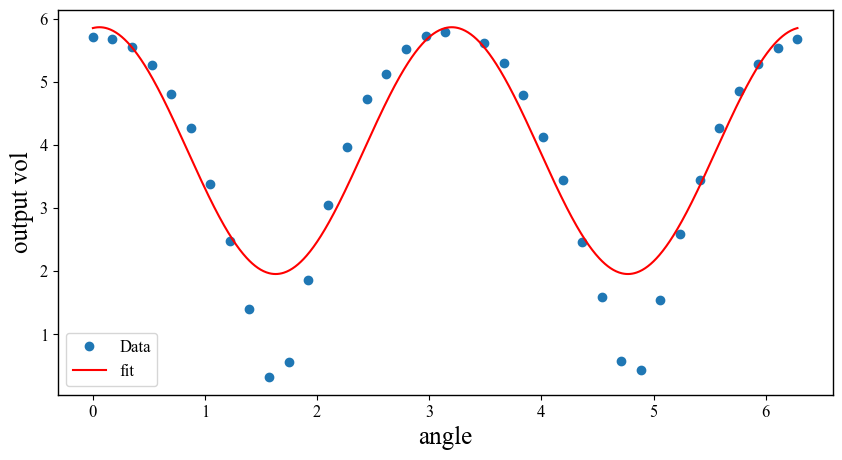

[ 1.95453368 -0.11762952]
the standard deviation is 0.0023693525333863302 on the amplitude, and 0.0055980806330322 on the phase


In [41]:
data = np.loadtxt('data/angle.txt', skiprows=2)
vol = data[:, 0]
angle = np.deg2rad(data[:, 1])
# x and b are in degrees, a is an amplitude constant

def func(x, a, b):
    return (a*np.cos(2*x + b)+2*a)

popt, pcov = curve_fit(func, angle, vol,p0 = (3.4,0))

angle_range = np.linspace(0, 2*np.pi, 1000)
plt.figure(figsize=(10, 5))
plt.plot(angle, vol,'o' ,label='Data')
plt.plot(angle_range, func(angle_range, *popt), 'r-', label='fit')
plt.xlabel('angle')
plt.ylabel('output vol')
plt.legend()
plt.show()
print(popt)
print(f'the standard deviation is {np.abs(np.diag(pcov)[0])} on the amplitude, and {np.abs(np.diag(pcov)[1])} on the phase')


# Part C

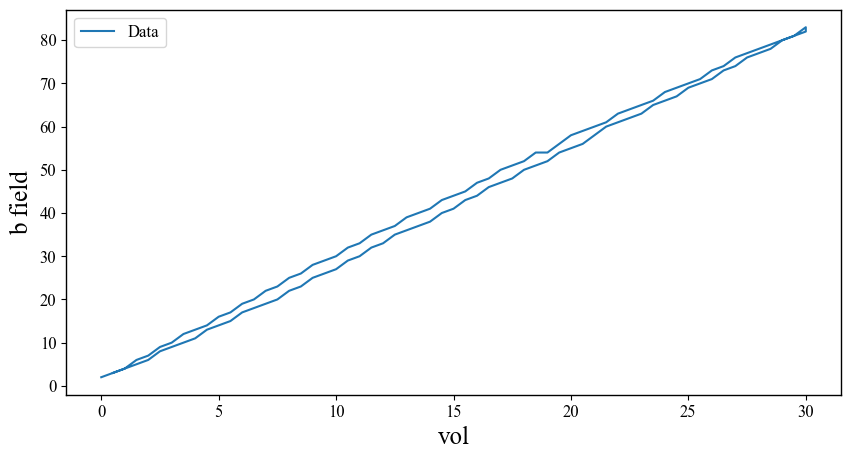

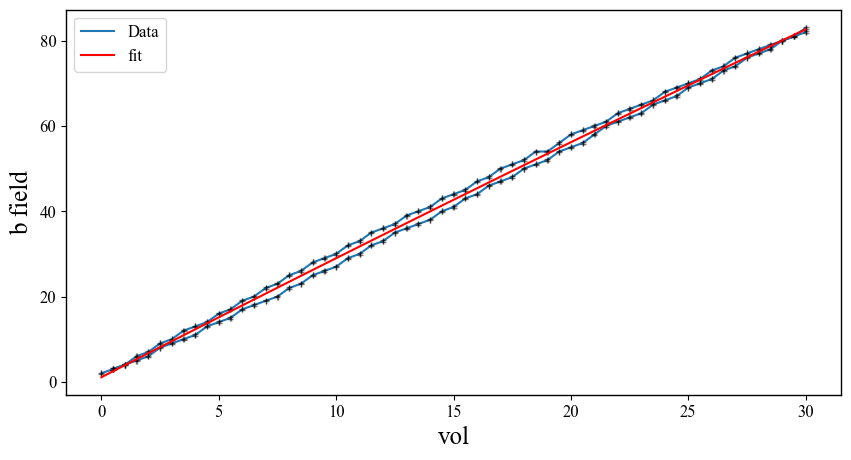

In [42]:
data =np.loadtxt('data/b_field_calibration.txt', skiprows=2)
vol = data[:, 0]
current = data[:, 1]
b_field = data[:, 2]
# x and b are in degrees, a is an amplitude constant
plt.figure(figsize=(10, 5))
plt.plot(vol, b_field, label='Data')
volt_err = 5e-3
plt.xlabel('vol')
plt.ylabel('b field')
plt.legend()
plt.show()

def poly(x, a, b, c):
    return a*x**2 + b*x + c

pop, pcov = curve_fit(poly, vol, b_field,p0 = (1,1,1),sigma = volt_err*np.ones(len(vol)))
b_err = (np.sqrt(np.diag(pcov))[0])
vol_range = np.linspace(0, 30, 1000)
plt.figure(figsize=(10, 5))
plt.plot(vol, b_field,label='Data' )
plt.errorbar(vol, b_field, yerr=np.sqrt(np.diag(pcov))[0]*100, fmt = 'None',color = 'black',alpha = 0.5,elinewidth = 1,capsize = 2)
plt.errorbar(vol, b_field, xerr=volt_err*np.ones(len(vol)), fmt = 'None',color = 'black',alpha = 0.5,elinewidth = 1,capsize = 2)
plt.plot(vol_range, poly(vol_range, *pop), 'r-', label='fit')
plt.xlabel('vol')
plt.ylabel('b field')
plt.legend()
plt.show()





# Part D

-------------------------------------
Hall voltage data at close to Liquid Nitrogen (78.4K)
The hall coeffiecient at close to Liquid Nitrogen (78.4K) is 2630.0551075677927 ± 1.400879552899593 m^3/C
The number of charge carriers per square is 2.373e+15 ± 1.264e+12


C:\Users\lewis\AppData\Local\Temp\ipykernel_30444\2905486596.py:71: RuntimeWarning: divide by zero encountered in divide
  tot_err = np.sqrt((errorBI/current)**2+(0.005e-3/volt)**2)


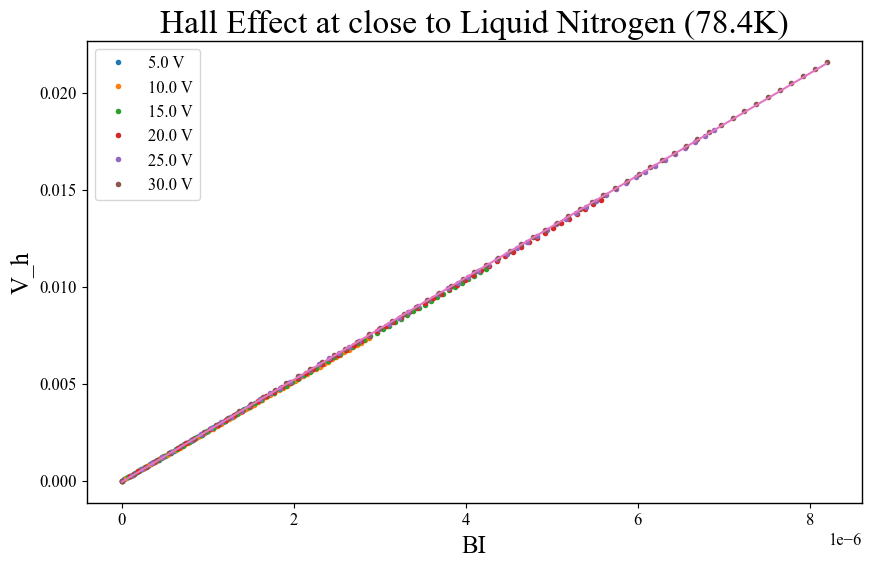

-------------------------------------
Hall voltage data at 300K
The hall coeffiecient at 300K is 1914.9733842462565 ± 2.135927343450879m^3/C
The number of charge carriers per square is 3.259e+15 ± 3.635e+12


C:\Users\lewis\AppData\Local\Temp\ipykernel_30444\2905486596.py:71: RuntimeWarning: divide by zero encountered in divide
  tot_err = np.sqrt((errorBI/current)**2+(0.005e-3/volt)**2)


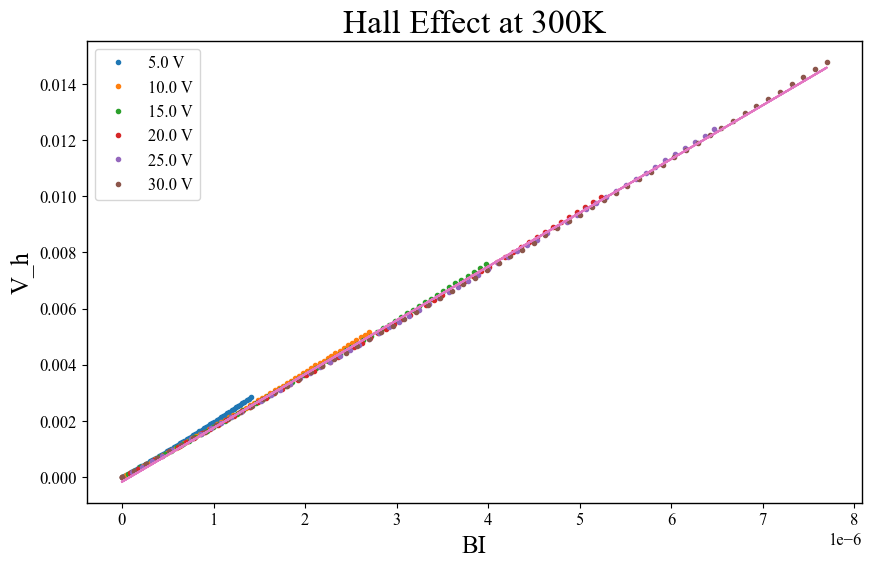

-------------------------------------
Longitudinal data at close to Liquid Nitrogen (78.4K)
The Resistance per square at close to Liquid Nitrogen (78.4K) is 142.53188627819716 ± 0.10547294523892414 


C:\Users\lewis\AppData\Local\Temp\ipykernel_30444\2905486596.py:108: RuntimeWarning: divide by zero encountered in divide
  error_long = (np.sqrt(((0.005e-3/voltage)**2)+(((0.005e-6)/current)**2)))


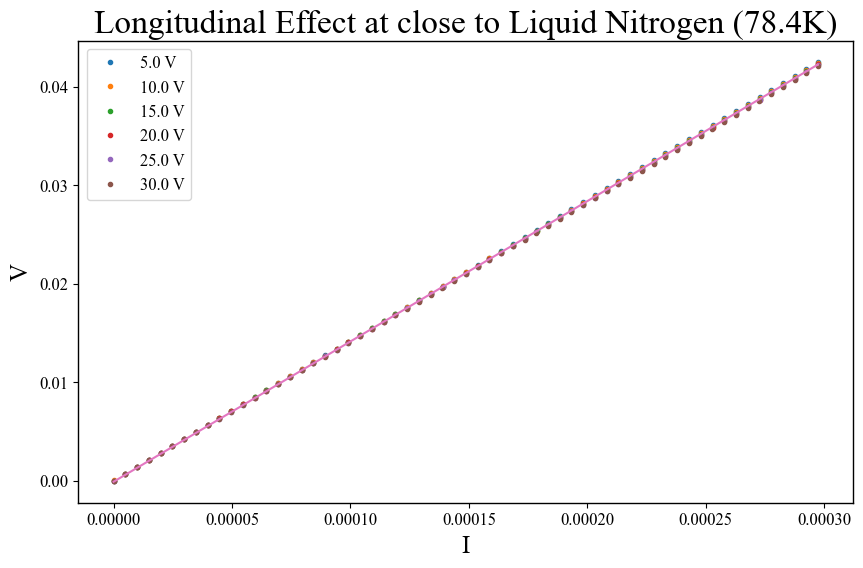

-------------------------------------
Longitudinal data at 300K
The Resistance per square at 300K is 2391.7751171731725 ± 1.8281316267225955 


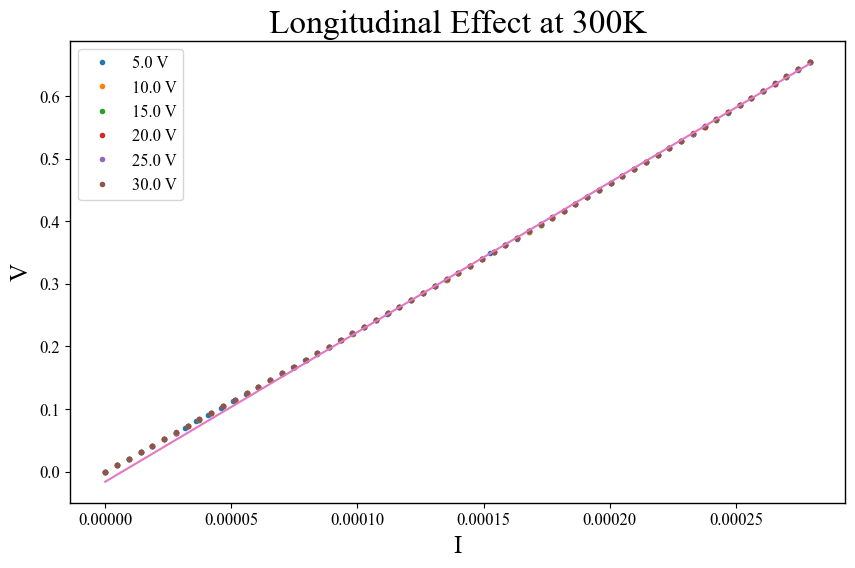

The mobility at 300K is 0.8006 ± 0.001083
The mobility at close to Liquid Nitrogen (78.4K) is 18.45 ± 0.01682


In [43]:
def linear(x, a, b):
    return a*x + b

hall_data = pd.read_pickle('data/part_D/Hall_data.pickle')
# print(hall_data)
files = os.listdir('data/part_D')

key_list = list(hall_data.keys())

np.array(key_list)
mag_volt = []
mag_volt_li = []
for i in np.arange(len(key_list)):
    mag_volt.append(float(key_list[i]))
    mag_volt_li.append(key_list[i])
magvolt = np.array(mag_volt)
magvolt = np.sort(magvolt)

ln = 'close to Liquid Nitrogen (78.4K)'

cold = []
hot = []
cold_r = []
hot_r = []
colderr = []
hoterr = []
cold_rerr = []
hot_rerr = []

for file in files:
    volt = []
    current = []
    gradient = []
    errorBI = []
    num = []
    curr = []
    errorlong = []


    if file.endswith('pickle') and file.startswith('Hall'):
        print('-------------------------------------')
        data = pd.read_pickle('data/part_d/'+file)
        plt.figure(figsize=(10,6))

        if file.startswith('Hall_cold'):
            print(f'Hall voltage data at {ln}')
            plt.title(f'Hall Effect at {ln}')

        elif file.startswith('Hall_data'):
            print('Hall voltage data at 300K')
            plt.title('Hall Effect at 300K')
        for i in np.arange(len(mag_volt_li)):

            b_field = (poly(magvolt[i], *pop))*1e-3
            fieldcurrent = b_field * data[(key_list[i])]['supplyCurr']
            error_BI = (np.sqrt(((b_err/b_field)**2)+(((0.005e-6)/data[(key_list[i])]['supplyCurr'])**2)))*fieldcurrent
            plt.plot(fieldcurrent,data[(key_list[i])]['hallBarVolt'], '.', label=f'{mag_volt_li[i]} V')
            plt.xlabel('BI')
            plt.ylabel('V_h')
            plt.legend()


            volt.append(data[(key_list[i])]['hallBarVolt'])
            current.append(fieldcurrent)
            errorBI.append(error_BI)


        volt = np.ndarray.flatten(np.array(volt))
        current = np.ndarray.flatten(np.array(current))
        errorBI = np.ndarray.flatten(np.array(errorBI))
        tot_err = np.sqrt((errorBI/current)**2+(0.005e-3/volt)**2)
        popt,pcov = curve_fit(linear, current, volt, p0 = (1,1),sigma = tot_err)
        plt.plot(current, linear(current, *popt), label=f'{mag_volt_li[i]} V')
        grad_err = np.sqrt(np.diag(pcov))[0]
        gradient = (popt[0])
        num = num_per_sq(gradient)
        num_err = (np.sqrt((grad_err/gradient)**2))*num

        if file.startswith('Hall_cold'):
            print(f'The hall coeffiecient at {ln} is {gradient} ± {grad_err} m^3/C')
            print(f'The number of charge carriers per square is {num:4.4g} ± {num_err:4.4g}')
            cold.append(num)
            colderr.append(num_err)

        elif file.startswith('Hall_data'):
            print(f'The hall coeffiecient at 300K is {gradient} ± {grad_err}m^3/C')
            print(f'The number of charge carriers per square is {num:4.4g} ± {num_err:4.4g}')
            hot.append(num)
            hoterr.append(num_err)


        plt.show()
    elif file.endswith('pickle') and file.startswith('Long'):
        print('-------------------------------------')
        plt.figure(figsize=(10,6))
        if file.startswith('Long_cold'):
            print(f'Longitudinal data at {ln}')
            plt.title(f'Longitudinal Effect at {ln}')
        elif file.startswith('Long_data'):
            print('Longitudinal data at 300K')
            plt.title('Longitudinal Effect at 300K')
        data = pd.read_pickle('data/part_d/'+file)
        gradient = []
        for i in np.arange(len(mag_volt_li)):

            voltage = data[key_list[i]]['hallBarVolt']
            current = data[key_list[i]]['supplyCurr']
            error_long = (np.sqrt(((0.005e-3/voltage)**2)+(((0.005e-6)/current)**2)))
            plt.plot(3*current, voltage, '.', label=f'{mag_volt_li[i]} V')
            plt.xlabel('I')
            plt.ylabel('V')
            plt.legend()
            volt.append(voltage)
            curr.append(current)
            # error2.append(error_hall)
            errorlong.append(error_long)

        volt = np.ndarray.flatten(np.array(volt))
        curr = np.ndarray.flatten(np.array(curr))
        errorlong = np.ndarray.flatten(np.array(errorlong))
        fieldcurrent = np.ndarray.flatten(np.array(fieldcurrent))
        pop_l,pcov = curve_fit(linear, 3*curr, volt, p0 = (1,1),sigma = errorlong)
        plt.plot(3*curr, linear(3*curr, *pop_l), label='Fit')
        gradient.append(pop_l[0])
        grad_long_err = np.sqrt(np.diag(pcov))[0]
        gradient = np.mean(np.array(gradient))
        if file.startswith('Long_cold'):
            print(f'The Resistance per square at {ln} is {gradient} ± {grad_long_err} ')
            cold_r.append(gradient)
            cold_rerr.append(grad_long_err)
        elif file.startswith('Long_data'):
            print(f'The Resistance per square at 300K is {gradient} ± {grad_long_err} ')
            hot_r.append(gradient)
            hot_rerr.append(grad_long_err)


        plt.show()

hot = float(hot[0])
cold = float(cold[0])
hot_r = float(hot_r[0])
cold_r = float(cold_r[0])
hoterr = float(hoterr[0])
colderr = float(colderr[0])
hot_rerr = float(hot_rerr[0])
cold_rerr = float(cold_rerr[0])


mu_h = mobility(float(hot), float(hot_r))
mu_c = mobility(cold, cold_r)
mu_h_err = np.sqrt(((hoterr/hot)**2)+((hot_rerr/hot_r)**2))*mu_h
mu_c_err = np.sqrt(((colderr/cold)**2)+((cold_rerr/cold_r)**2))*mu_c


print(f'The mobility at 300K is {mu_h:4.4g} ± {mu_h_err:4.4g}')
print(f'The mobility at {ln} is {mu_c:4.4g} ± {mu_c_err:4.4g}')

